# 仮説検定に関する不適切な解説の例

* 黒木玄
* 2023-08-27
$
\newcommand\R{\mathbb{R}}
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\var{\op{var}}
\newcommand\wald{\op{Wald}}
\newcommand\wilson{\op{Wilson}}
\newcommand\pdf{\op{pdf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ccdf{\op{ccdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Normal{\op{Normal}}
\newcommand\phat{\hat{p}}
$

このノートブックで用いた[Julia言語](https://julialang.org/)の使い方については以下の資料が参考になるだろう:

* https://nbviewer.org/github/genkuroki/msfd28/blob/master/msfd28genkuroki.ipynb
* https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#仮説検定を用いて自信過剰になってはいけない" data-toc-modified-id="仮説検定を用いて自信過剰になってはいけない-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>仮説検定を用いて自信過剰になってはいけない</a></span></li><li><span><a href="#補足:-統計モデル＋帰無仮説が正しいことがほぼ確実な場合について" data-toc-modified-id="補足:-統計モデル＋帰無仮説が正しいことがほぼ確実な場合について-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>補足: 統計モデル＋帰無仮説が正しいことがほぼ確実な場合について</a></span></li><li><span><a href="#NHK高校講座における仮説検定の解説の不適切さ" data-toc-modified-id="NHK高校講座における仮説検定の解説の不適切さ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NHK高校講座における仮説検定の解説の不適切さ</a></span><ul class="toc-item"><li><span><a href="#NHK高校講座における仮説検定の解説の概略" data-toc-modified-id="NHK高校講座における仮説検定の解説の概略-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>NHK高校講座における仮説検定の解説の概略</a></span></li><li><span><a href="#NHK高校講座における仮説検定の解説の非常にまずい所" data-toc-modified-id="NHK高校講座における仮説検定の解説の非常にまずい所-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>NHK高校講座における仮説検定の解説の非常にまずい所</a></span></li><li><span><a href="#実質的な有意水準と検出力の計算例" data-toc-modified-id="実質的な有意水準と検出力の計算例-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>実質的な有意水準と検出力の計算例</a></span></li></ul></li><li><span><a href="#冨田真永先生による仮説検定の授業実践の不適切さ" data-toc-modified-id="冨田真永先生による仮説検定の授業実践の不適切さ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>冨田真永先生による仮説検定の授業実践の不適切さ</a></span><ul class="toc-item"><li><span><a href="#学習指導要領解説にある新素材の枕の例" data-toc-modified-id="学習指導要領解説にある新素材の枕の例-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>学習指導要領解説にある新素材の枕の例</a></span></li><li><span><a href="#冨田真永先生による仮説検定の授業実践の内容" data-toc-modified-id="冨田真永先生による仮説検定の授業実践の内容-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>冨田真永先生による仮説検定の授業実践の内容</a></span></li><li><span><a href="#対照群の必要性" data-toc-modified-id="対照群の必要性-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>対照群の必要性</a></span></li></ul></li><li><span><a href="#まとめ" data-toc-modified-id="まとめ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>まとめ</a></span></li></ul></div>

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250),
    titlefontsize=10, guidefontsize=8, tickfontsize=6)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

mypdf (generic function with 1 method)

## 仮説検定を用いて自信過剰になってはいけない

仮説検定を使えば本当は得られるはずがない強い結論が得られるかのような解説は実践的に極めて有害である.

仮説検定は, 対立仮説との比較での統計モデル＋帰無仮説とデータの数値の相性の良さがある閾値未満になったかどうかを判定でする手続きに過ぎない.

多くの場合に, データの数値は偏っている疑いを排除できないし, 統計モデルの妥当性も保証できない.

だから, 統計モデル＋帰無仮説とデータの数値の相性がどんなに悪くても, 帰無仮説単体を否定することはできない.

さらに, 帰無仮説が正しいことがほぼ確実である場合には, 統計モデルとデータの数値の両方が妥当であったとしても, 帰無仮説が仮説検定の手続きで棄却されたときに, 帰無仮説が否定されたと考えることが不適切になることもありえる. 

こういう事情があるので, 仮説検定の手続きで得た結果を過信して, 自信過剰になることは実践的には極めて有害である.

現実の問題において, 何かまともな結論を出したければ, 仮説検定の手続きに従うだけでは不十分であり, 仮説検定の手続き外の多くのことについて慎重に考察する必要が生じる.

高校生には仮説検定の手続きを過信して自信過剰にならないように教えなければいけない.

以下では, 自信過剰になることを推奨しているように見える不適切な解説の例を紹介する.

__ポイント:__

1. 仮説検定は

  * データの数値
  * 統計モデル
  * 統計モデルのパラメータの値に関する帰無仮説
  
  の(対立仮説との比較での)相性の良さの指標であるP値が有意水準と呼ばれる閾値未満になるかを判定する手続きである.

2. 多くの場合に, 現実から得たデータの数値については偏っている疑いを排除できない.

3. 多くの場合に, 統計モデルの妥当性は十分に保証できない.

4. ゆえに, 仮説検定の手続きによって, データの数値, 統計モデル, 帰無仮説の3つの間の相性が非常に悪いことが判明し, それらのうちどれかを否定することが妥当だと考えられる場合であっても, 帰無仮説単体を否定したり, 疑ったりすることは不適切である.  データの数値, 統計モデル, 帰無仮説のすべてを疑う必要がある.

5. 統計モデル＋帰無仮説が現実においても正しいことがほぼ確実な場合には, 仮説検定の手続きによって帰無仮説が棄却されても帰無仮説を否定することは不適切になる.

6. 仮説検定の手続きで得た結果を過信してはいけない.

## 補足: 統計モデル＋帰無仮説が正しいことがほぼ確実な場合について

簡単のため, 帰無仮説が正しい確率は $a$ であり, 対立仮説の典型的な状況の側が正しい確率は $1-a$ であると仮定する. 帰無仮説が正しいことがほぼ確実な場合とは例えば $a=0.9999$ のように $a$ が $1$ に非常に近い状況のことである.

現実において仮説検定を適用する場合には, 有意水準を $\alpha = 5\%$ に設定し, 検出力を $80\%$ に設定することが多い.  ここで, 

* 有意水準とは, 帰無仮説が正しいときに, 帰無仮説が棄却される確率のことである.
* 検出力とは, 対立仮説の典型的な状況が正しいときに, 帰無仮説が棄却される確率のことである.

この慣例に従い, 帰無仮説が正しいときに帰無仮説 $5%$ であり, 対立仮説の典型的な状況の側が正しいときには $80\%$ であると仮定する.

以上の設定で, 帰無仮説が棄却される確率は,

$$
0.05a + 0.8(1-a)
$$

になる. そして, 帰無仮説が棄却されたという条件の下での対立仮説が正しい条件付き確率は

$$
f(a) = \frac{0.8(1-a)}{0.05a + 0.8(1-a)}
$$

になる. 例えば, 帰無仮説が正しい確率が $1$ に近い $a = 0.99, 0.999, 0.9999, 0.99999$ のとき

$$
\begin{aligned}
&
f(0.999) \approx 0.015763546798029573,
\\ &
f(0.9999) \approx 0.0015976035946079123,
\\ &
f(0.99999) \approx 0.00015997600359873214.
\end{aligned}
$$

と帰無仮説が棄却されたという条件の下での対立仮説が正しい条件付き確率は非常に小さくなる.

このように, 帰無仮説が正しいことがほぼ確実な場合には, 有意水準 $5\%$, 検出力 $80\%$ の仮説検定は __ザル__ になってしまい, 全然信用できなくなる.

帰無仮説が正しい確率が $a = 0.5$ のときの帰無仮説が棄却されたという条件の下での対立仮説が正しい条件付き確率は

$$
f(0.5) \approx 0.9411764705882353.
$$

こういう場合であれば, 仮説検定の結果はかなり信用できる.　しかし, $6%$ 程度の確率が間違うので, やはり過信してはいけない.

そして, さらに, 以上は, データの数値も統計モデルも検出力の見積もりもすべて妥当であるという都合の良い前提の下での結果に過ぎない.  実践的な状況ではそれらがすべて疑わしくなるので, より慎重な考察が必要になる.

In [13]:
f(a) = 0.8(1-a)/(0.05a + 0.8(1-a))

f (generic function with 1 method)

In [14]:
@show f(0.99);
@show f(0.999);
@show f(0.9999);
@show f(0.99999);

f(0.99) = 0.1391304347826088
f(0.999) = 0.015763546798029573
f(0.9999) = 0.0015976035946079123
f(0.99999) = 0.00015997600359873214


In [16]:
@show f(0.1) f(0.2) f(0.3) f(0.4) f(0.5) f(0.6) f(0.7) f(0.8) f(0.9);

f(0.1) = 0.993103448275862
f(0.2) = 0.9846153846153846
f(0.3) = 0.9739130434782608
f(0.4) = 0.96
f(0.5) = 0.9411764705882353
f(0.6) = 0.9142857142857143
f(0.7) = 0.8727272727272728
f(0.8) = 0.7999999999999999
f(0.9) = 0.6399999999999999


## NHK高校講座における仮説検定の解説の不適切さ

### NHK高校講座における仮説検定の解説の概略

* [NHK高校講座 数学Ⅰ](https://www.nhk.or.jp/kokokoza/suugaku1/
  * [第37回　仮説検定](https://www2.nhk.or.jp/kokokoza/watch/?das_id=D0022140039_00000)
    * [文字と画像で見る](https://www.nhk.or.jp/kokokoza/suugaku1/contents/resume/resume_0000001287.html)

この解説のまずい点を適当に無視して, 好意的に解釈すると以下のようなストーリーで解説が進んで行く.

(1) ここにあるコインを10回投げたら1回しか表が出なかった.  表が出にくいように細工されてるのではないか?

(2) 二項分布モデルを仮定し,

* 帰無仮説「表の出る確率は $1/2$ である」
* 対立仮説「表の出る確率は $1/2$ より小さい」

の仮説検定を行おう.

(3) 有意水準を $5\%$ に設定する. すなわち, 二項分布モデル＋帰無仮説の下で表の出る回数がデータの数値以下になる確率が $5\%$ 未満であれば帰無仮説を棄却することにする.

(4) 「二項分布モデル＋帰無仮説の下で表の出る回数がデータの数値以下になる確率」=「表の出る確率が $1/2$ の二項分布において表の出る回数が10回中1回以下になる確率」は次になる:

$$
\binom{10}{1}\left(\frac{1}{2}\right)^1\left(\frac{1}{2}\right)^9 +
\binom{10}{0}\left(\frac{1}{2}\right)^0\left(\frac{1}{2}\right)^{10}
= \frac{10 + 1}{2^{10}}
= \frac{11}{1024}
= 0.0107421875.
$$

これは約 $1\%$ であり, 上で設定した有意水準 $5\%$ よりも小さいので, 帰無仮説は棄却された.

__注意:__ この場合には約 $1\%$ になった「二項分布モデル＋帰無仮説の下で表の出る回数がデータの数値以下になる確率」は __片側検定のP値__ もしくは __片側P値__ と呼ばれる.  通常の仮説検定は両側検定の方を使う場合が多く, __両側検定のP値__ の1つの定義の仕方は片側検定の2倍である.  だから, 報道などに登場するP値(両側P値であることが多い)と比較すると, 片側P値を使用した場合にはP値が半分に過小評価されていることになるので, その点に注意が必要にある.

__注意:__ 高校では ${}_nC_k$ と書かれる組み合わせの数は上のように $\ds\binom{n}{k}$ と書かれることが多い.

In [3]:
binomial(10, 1)*(1/2)^1*(1/2)^9 + binomial(10, 0)*(1/2)^0*(1/2)^10

0.0107421875

In [4]:
11/1024

0.0107421875

(5) 結論

>アイク「やっぱりこのコイン、細工されてたんだなあ。うん。ぼくの思った通りだったよ！こんなふうに数学的に確かめる方法があったんですね。すっきり～」

<br><br><br><br><br>

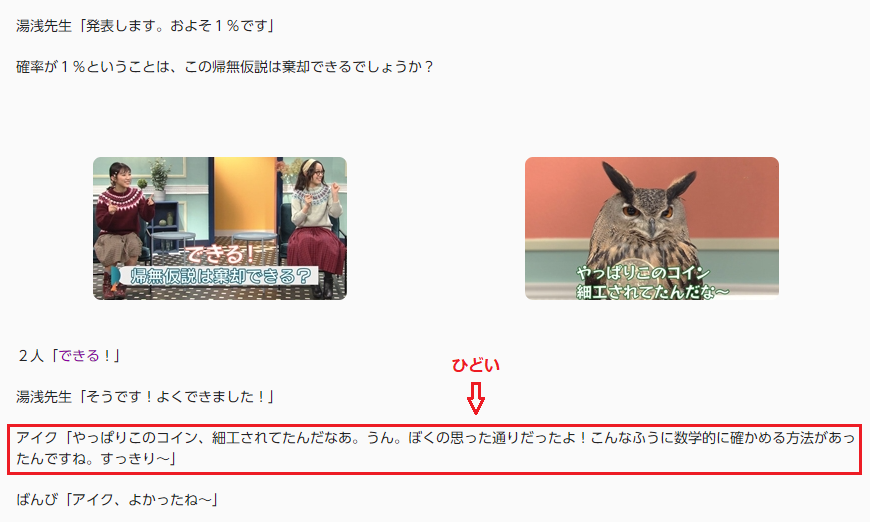

(6) 補足

>帰無仮説が起こりうる確率が有意水準より下の場合は、帰無仮説を棄却できます。

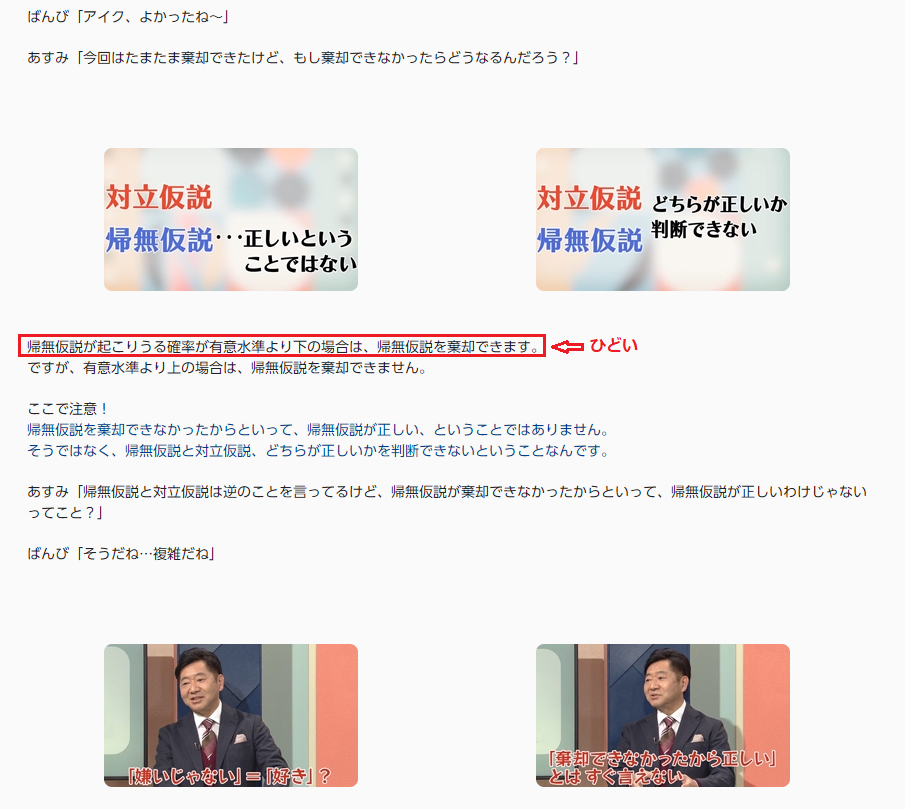

<br><br><br><br><br>

### NHK高校講座における仮説検定の解説の非常にまずい所

まず, 

>帰無仮説が起こりうる確率が有意水準より下の場合は、帰無仮説を棄却できます。

という説明は完全に間違っている.  「帰無仮説が起こりうる確率」なるものは二項分布モデルの中では定義されておらず, この解説の文脈では出て来るはずがない言い方である.  正しくは

* 帰無仮説の下での二項分布モデル内でデータの数値以上に偏った値が生じる確率が有意水準未満になった場合には, 帰無仮説を棄却する.

と言う必要がある.  しかし, 

* 帰無仮説が棄却されなかった場合には判断を保留する.

というのは正しい.

次に, 

>アイク「やっぱりこのコイン、細工されてたんだなあ。うん。ぼくの思った通りだったよ！こんなふうに数学的に確かめる方法があったんですね。すっきり～」

の部分は __ひどい!__

__このような自信過剰の結論を出す方法を数学も統計学も提供していない.__

表が出る確率がちょうど $1/2$ であっても10回中1回以下しか表が出ない確率は $1%$ もある.  その $1\%$ が単に起こっただけなのかもしれない.  さらに実験の仕方やデータの記録の仕方が悪くて, データの数値が信用できない可能性もある.

その他もろもろの疑いについても考える必要がある.

例えば「そのコインをどのように手に入れたか」「コインに細工がされていたか否かに関する結果をどのように使うか」によって慎重さを変える必要がある.


例えば, そのコインが自分の財布から取り出したいかにも細工されてなさそうな普通の100円玉の場合には, 帰無仮説の側が正しいことはほぼ確実である.  このような場合に仮説検定の結果は全然信用できなくなることについては上の方ですでに説明した.

さらに, コインに細工されているか否かに関する判断を, 違法ギャンブルの元締めであるマフィアにクレームをつけるために使用する場合には相当な慎重さが求められるだろう.  その場合には $5\$ の有意水準では自分の命を安全が得られるとは到底思えない.  (この段落は冗談としてマフィアの話にしたが, 違法でない深刻な問題に関わる場合も本質的に同様である.)

仮説検定について教えるときには, その結果を過信して自信過剰にならないようにしつこく言う必要があると思われる.

### 実質的な有意水準と検出力の計算例

帰無仮説「表の出る確率は $1/2$ である」の下での試行回数 $10$ の二項分布内で $k$ 以下の値が生じる確率 $P$ は以下のようになる:

In [5]:
[(k=k, P=cdf(Binomial(10, 1/2), k)) for k in 0:10]

11-element Vector{NamedTuple{(:k, :P), Tuple{Int64, Float64}}}:
 (k = 0, P = 0.0009765625000000002)
 (k = 1, P = 0.010742187499999998)
 (k = 2, P = 0.05468750000000023)
 (k = 3, P = 0.17187499999999978)
 (k = 4, P = 0.3769531250000003)
 (k = 5, P = 0.6230468749999998)
 (k = 6, P = 0.8281250000000002)
 (k = 7, P = 0.9453124999999998)
 (k = 8, P = 0.9892578125)
 (k = 9, P = 0.9990234375)
 (k = 10, P = 1.0)

この片側P値が有意水準 $5\%$ 未満であることと $k$ が $1$ 以上であることは同値である.  

ゆえに, 帰無仮説「表の出る確率は $1/2$ である」の下での試行回数 $10$ の二項分布内で, 帰無仮説が有意水準 $5\%$ の片側検定で棄却される確率は約 $1\%$ になる.  

この値は有意水準の $5\%$ よりもかなり小さい.

離散分布の仮説検定ではこのようなことが起きがちである.

対立仮説「表の出る確率は $1/2$ より小さい」の典型的な場合として「表の出る確率は $1/10$ である」を考えたとする.  「表の出る確率は $1/10$ である」という仮説の検出力を求めてみよう. 

仮説「表の出る確率は $1/10$ である」の下での試行回数 $10$ の二項分布内で, 帰無仮説が有意水準 $5\%$ の片側検定で棄却される確率は, その二項分布内で $1$ 以下の値が生成される確率として計算される. その結果は

$$
\sum_{k=0}^1 \binom{10}{k}\left(\frac{1}{10}\right)^k\left(\frac{9}{10}\right)^{10-k}
\approx 0.7360989291
$$

検出力は $74\%$ 程度である.  

すなわち, 仮に表の出る確率が $1/10$ しかなかったとしても, 「表の出る確率は $1/2$ である」という帰無仮説の有意水準 $5\%$ の片側検定で帰無仮説が棄却される確率は $74\%$ 程度で, 棄却されない確率は $26\%$ 程度になる.

In [6]:
cdf(Binomial(10, 1/10), 1)

0.7360989290999997

In [7]:
sum(binomial(10, k)*(1/10)^k*(9/10)^(10-k) for k in 0:1)

0.7360989291000002

## 冨田真永先生による仮説検定の授業実践の不適切さ

### 学習指導要領解説にある新素材の枕の例

__注意警告:__ 学習指導要領そのものと学習指導要領解説は異なる文書であることに注意せよ.  前者は告示だが, 後者の解説は単なる文科省著作物に過ぎず, 拘束力はない. だから, 学習指導要領解説に従って不適切な授業をしてしまった場合には, その授業をした人自身にも責任が生じる.

後で紹介する冨田先生による授業実践は学習指導要領解説に書いてある教え方が元になっているので, その部分を

* [高等学校学習指導要領解説](https://www.mext.go.jp/a_menu/shotou/new-cs/1407074.htm)
  * [【数学編　理数編】高等学校学習指導要領（平成30年告示）解説](https://www.mext.go.jp/content/20230217-mxt_kyoiku02-100002620_05.pdf)

のp.48 (pdfの60ページ目)から引用しよう:

>　例えば，「ある新素材の枕を使用した30 人のうち80％にあたる24 人が以前よりよく眠
れたと回答した」という結果に対して，新素材の枕を使用するとよく眠ることができると
判断できるか，という問題に取り組ませることを考える。この問題を解決するために，こ
の結果が偶然に起こりえた可能性はどのくらいあるのかを，コイン等を使った実験を多数
回繰り返して考察する。つまり，以前よりよく眠れた場合とそうでない場合が起こる可能
性が半々だとしたとき，24 人以上がよく眠れたと回答することがどの程度起こるかを考
える。実験として，コインが表
おもて
になった場合を「以前よりよく眠れた場合」とし，コイン
を30 回投げるという試行を繰り返す。実験結果を表やグラフなどに整理し，24 枚以上表
になった回数の相対度数p を「起こりえないこと」の尺度として用いることで，「30 人中
24 人以上がよく眠れたと回答することが，無作為性（ランダムネス）だけで説明できる
可能性はp しかないように思われる。」という，判断の根拠が得られたことになる。この
「起こりえないこと」かどうかの基準として，平均から2s（s は標準偏差）あるいは3s 離
れた値を用いることが考えられる。この考え方を数学的に精緻化していくと，「帰無仮説：
新素材の枕はよく眠れる効果がなかった」を確率分布を用いて検定する「数学B」の内容
につながる。

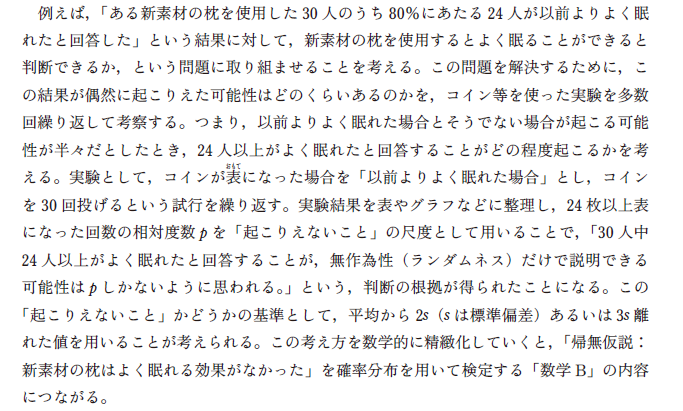

しかし, 正しくは次のように考える必要がある:

* 新素材の枕の効果を知りたければ, 新素材を使っていない枕を使った場合との比較が必要である.  すなわち, 対照群との比較が必要である.

### 冨田真永先生による仮説検定の授業実践の内容

* 冨田真永 (静岡県立静岡西高等学校), 批判的思考に基づく数学Ⅰ「仮説検定の考え方」の指導に関する研究, 日本科学教育学会第43回年会論文集（2019）
<br>https://www.jstage.jst.go.jp/article/jssep/43/0/43_231/_article/-char/ja/

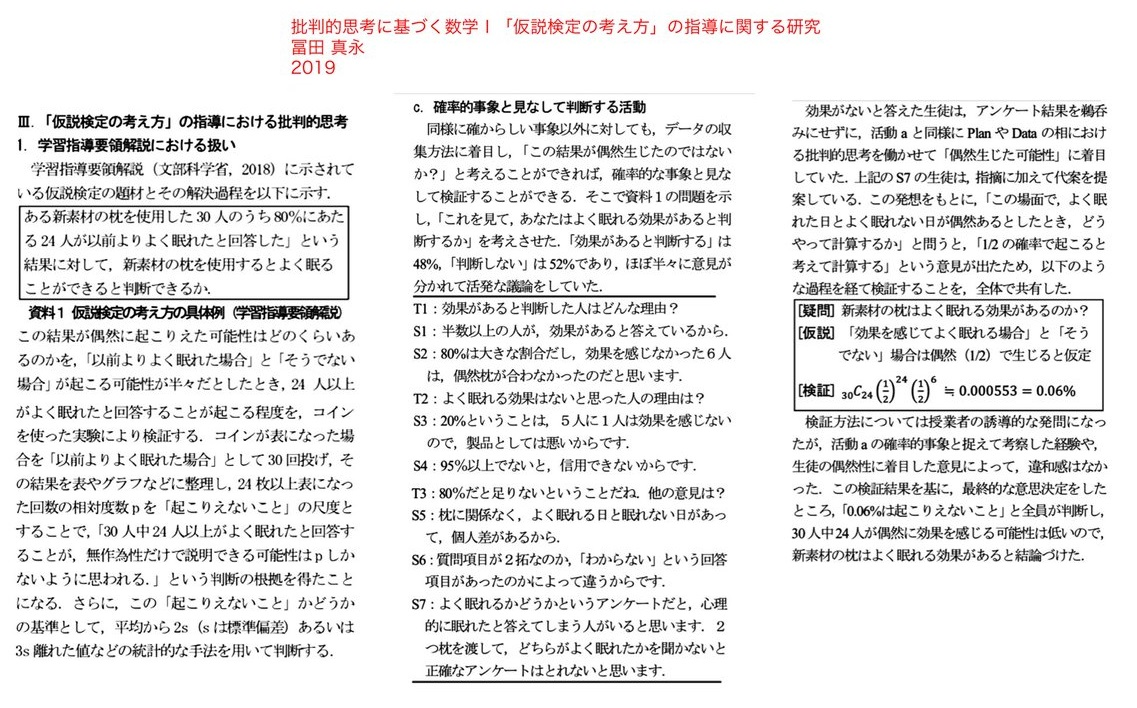

この報告で説明されている授業実践の概要は以下の通りである.

(1) 学習指導要領解説(学習指導要領そのものではないことに注意!)で扱われている次の問題について考えよう:

>ある新素材の枕を使用した30 人のうち80％にあた
る24 人が以前よりよく眠れたと回答した」という
結果に対して，新素材の枕を使用するとよく眠る
ことができると判断できるか．

__コメント:__ 新素材の効果を知りたければ, 新素材を使っていない枕との比較が必要.  新素材の枕の感想のみを集めても新素材の効果は分からない.  だから, この問題設定自体が非常にまずいものになっている.

(2) 教師の問い(T)と生徒の意見(S)

>「効果があると判断する」は
48%，「判断しない」は52%であり，ほぼ半々に意見が
分かれて活発な議論をしていた．

>T1：効果があると判断した人はどんな理由？

>S1：半数以上の人が，効果があると答えているから．

>S2：80%は大きな割合だし，効果を感じなかった６人
は，偶然枕が合わなかったのだと思います．

>T2：よく眠れる効果はないと思った人の理由は？

>S3：20%ということは，５人に１人は効果を感じない
ので，製品としては悪いからです．

>S4：95％以上でないと，信用できないからです．

>T3：80％だと足りないということだね．他の意見は？

>S5：枕に関係なく，よく眠れる日と眠れない日があっ
て，個人差があるから．

>S6：質問項目が２拓なのか，「わからない」という回答
項目があったのかによって違うからです．

>S7：よく眠れるかどうかというアンケートだと，心理
的に眠れたと答えてしまう人がいると思います．２
つ枕を渡して，どちらがよく眠れたかを聞かないと
正確なアンケートはとれないと思います．

__コメント:__ 特に注目するべきなのは生徒の意見S7である.  S7の意見は新素材を使っていない枕との比較が必要だという正しい意見を述べているとも解釈できる.

(3) S7の意見の取り扱い

>上記のS7 の生徒は，指摘に加えて代案を提
案している．この発想をもとに，「この場面で，よく眠
れた日とよく眠れない日が偶然あるとしたとき，どう
やって計算するか」と問うと，「1/2 の確率で起こると
考えて計算する」という意見が出たため，以下のよう
な過程を経て検証することを，全体で共有した．

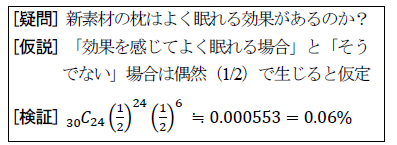

>この検証結果を基に，最終的な意思決定をした
ところ，「0.06%は起こりえないこと」と全員が判断し，
30人中24人が偶然に効果を感じる可能性は低いので，
新素材の枕はよく眠れる効果があると結論づけた．

__コメント:__ __これはひどい.__  新素材の枕とそうでない枕の2つの枕の比較が必要だという正しく標準的な考え方を述べているようにも解釈されるS7の意見は, 授業のあいだに潰されてしまい, 全体で「新素材の枕はよく眠れる効果があると結論づけた」となってしまった.

__注意:__ 上で計算している

$$
{}_{30}C_{24}\left(\frac{1}{2}\right)^{24}\left(\frac{1}{2}\right)^{6}
\approx 0.0005529960617423058
$$

は通常使われている帰無仮説の下での「30人中24人 __以上__ が以前よりよく眠れたと答える確率」(__片側P値__ と呼ばれる)ではなく, 「30人中24人 __ちょうど__ が以前よりよく眠れたと答える確率」(__尤度__ (ゆうど)と呼ばれる)である.  元の学習指導要領解説(学習指導要領とは異なる文書)では「24 人 __以上__ がよく眠れたと回答することがどの程度起こるかを考える」としているので, この点についても誤解があったように見える.  上の場合に, 「30人中24人 __以上__ が以前よりよく眠れたと答える確率」の値は次のようになる:

$$
\sum_{k=24}^{30} \binom{30}{k}\left(\frac{1}{2}\right)^{k}\left(\frac{1}{2}\right)^{30-k}
\approx 0.0007154531776905
$$

すなわち, 「以前よりよく眠れたと答える確率は $1/2$ である」という帰無仮説の片側P値は $0.07\%$ 程度になる.

In [8]:
binomial(30, 24)*(1/2)^24*(1/2)^6

0.0005529960617423058

In [9]:
sum(binomial(30, k)*(1/2)^k*(1/2)^(30-k) for k in 24:30)

0.000715453177690506

In [10]:
1 - cdf(Binomial(30, 1/2), 23) # needs using Distributions

0.000715453177690506

In [11]:
ccdf(Binomial(30, 1/2), 23)

0.000715453177690508

### 対照群の必要性

新品の枕を「これは素晴らしい枕です」と言いながら手渡されて実際に使用してみた人が「以前よりよく眠れた」と答える確率は新素材であるか否かと無関係に $1/2$ よりも大きくなる可能性がある. 

例えば, 「以前よりよく眠れた」と答える確率が $2/3$ であるならば, 片側P値は $8.4\%$ 程度になる.  これは片側
P値としてかなり大きな値であり, 「30人以上24人が以前よりよく眠れたと答えた」というデータの数値によって, 「以前よりよく眠れたと答える確率は $2/3$ である」という仮説が有意水準 $5\%$ の片側検定によって棄却されないことを意味している.

In [12]:
ccdf(Binomial(30, 2/3), 23)

0.08383843843843043

「これは素晴らしい枕です」と言われたことの心理的効果や新品の枕が気持ち良いという効果などによって, 新素材であるかと無関係に「以前よりよく眠れた」と答える人が増える可能性がある.
 
そのような新素材であることとは無関係の効果を除いた効果を見なければ, 新素材であること自体による効果はわからない.
 
このような注意は統計学の実践的な応用では最も本質的な事柄であり, 高校生に統計学について教えるときにも注意しなければいけない. 

## まとめ

* 仮説検定についてはその結果を過信して自信過剰にならないように教える必要がある.
* 対照群が必要な場合には, 対照群無しの仮説検定の結果は信用できないと教える必要がある.
* 学習指導要領解説(学習指導要領とは厳密に異なる文書で拘束力はない)の内容はあまり信用できない.